## K-Fold Cross Validation
Testing accuracy for just once doesn't account for the variance in the data and might give misleading results. K-Fold validation randomly selects one of $k$ parts of the data set then tests the accuracy on the same. After required number of iterations, the accuracy is averaged

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X = X_sca.fit_transform(X)

In [ ]:
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


kfold_cv = KFold(n_splits=10)
correct = 0
total = 0
for train_indices, test_indices in kfold_cv.split(X):
    X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], \
                                        y[train_indices], y[test_indices]
    clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)
    correct += accuracy_score(y_test, clf.predict(X_test))
    total += 1
print("Accuracy: {0:.2f}".format(correct/total))
    

Accuracy: 0.82


In [ ]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)


In [ ]:
# applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(clf, X_train, y_train, cv=10)
print accuracies
print accuracies.mean()
print accuracies.std()

[ 0.90322581  0.90322581  0.77419355  0.87096774  0.77419355  0.86206897
  0.82758621  0.68965517  0.79310345  0.89655172]
0.829477196885
0.0671935884472


## Leave one out cross validation

Another type of cross validation is leave one out cross validation. Out of the $n$ samples, one of them is left out and the model is trained on other samples. When K in KFold validation is equal to the number of samples then K-Fold validation is same as leave one out cross validation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X = X_sca.fit_transform(X)

In [ ]:
from __future__ import division
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

loo_cv = LeaveOneOut()
correct = 0
total = 0
for train_indices, test_indices in loo_cv.split(X):
#     uncomment these lines to print splits
#     print("Train Indices: {}...".format(train_indices[:4]))
#     print("Test Indices: {}...".format(test_indices[:4]))
#     print("Training SVC model using this configuration")
    X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], \
                                        y[train_indices], y[test_indices]
    clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)
    correct += accuracy_score(y_test, clf.predict(X_test))
    total += 1
print("Accuracy: {0:.2f}".format(correct/total))

Accuracy: 0.84


## Stratified KFold

Kfold validation does not preserve the split of the output variable while splitting the data in k-folds. Imagine training a Naive Bayes classifier using KFold validation using 10 samples where 5 are positive and 5 are negative. Since KFold randomly selects the split imagine splitting it in an unfortunate way -- 1 split contains all positive samples and 1 contains all negative. Naive Bayes classifier will calculate the prior probabilities and find it to be 100% i.e. the model will think the output is always positive which is obviously wrong. To tackle this scenario we use Stratified split, what it would essentially do is preserve the split in the original dataset in training set, that is, if the original dataset has 50% positive and 50% negative outputs then the training set will also have 50% positive and 50% negative outputs. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X = X_sca.fit_transform(X)

## Validating Time Series data
Time series data is data associated with a time frame, for instance stock prices. The motivation is to predict stock price for future given the data from previous data. If we were to use any splitting techniques from above we would end up predicting past from future (due to random nature from splitting) which shouldn't be permitted, we should always predict future from past. This can be achieved using TimeSeriesSplit


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

X = np.random.rand(10, 2)
y = np.random.rand(10)
print(X)
print(y)

[[ 0.08485204  0.84689345]
 [ 0.02834187  0.68234029]
 [ 0.36309891  0.07100943]
 [ 0.66955444  0.88070583]
 [ 0.28241451  0.56733126]
 [ 0.30521588  0.73973179]
 [ 0.0566575   0.96430919]
 [ 0.53957399  0.05946202]
 [ 0.11530205  0.16625273]
 [ 0.89429006  0.83914383]]
[ 0.97006781  0.81953045  0.50522986  0.88384404  0.30715333  0.9750431
  0.68943093  0.74947717  0.93600522  0.33118984]


## Confusion Matrix

Confusion matrix is used only on classification tasks. It describes the following matrix

|            | predicted true | predicted false |
|------------|----------------|-----------------|
|actual true | True Positive  | False Negative  |
|actual false| False Positive | True Negative   |

---------------------------------------------------

### Accuracy

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

### Precision (Positive Predicted Value) 

$$\text{Precision} = \frac{TP}{TP + FP}$$

Intuitively, what precision states is out of the number of times your model predicts true, how many times is it correct? This metric penalizes heavily for False Positives. This metric should be considered when its OK to have some false negatives but not false positives. Imagine if your model is predicting the conclusion of a jurisdiction. Its OK to leave a criminal free, rather than punishing an innocent one. 

### Recall (Sensitivity) 

$$\text{Recall} = \frac{TP}{TP + FN}$$

Intuitively, what recall states is out of the times the output is true, how many times are you correct? This metric penalizes heavily for False Negatives. This metric should be considered when its OK to have some false positives but not false negatives.


### F1 Score

F1 score is the harmonic mean of precision and recall. 


$$\text{F}_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X, y = make_classification()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
clf = SVC().fit(X_train, y_train)
confusion_matrix(y_test, clf.predict(X_test))

array([[10,  0],
       [ 1,  9]], dtype=int64)

|            | predicted true | predicted false |
|------------|----------------|-----------------|
|actual true |        10      |        0        |
|actual false|         1      |        9        |

## Grid Search

Grid Search is used for hyperparameter optimization. It allows you to specify range of values (for hyperparameters) to try on and in the end select the one with the highest cv accuracy. 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)


from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)



In [ ]:
# Grid search
from sklearn.model_selection import GridSearchCV
# insert parameters that you want to optimize
parameters = [
    {
        'C': [1, 10, 100, 1000],
        'kernel': ['linear']
    },
    {
        'C': [1, 10, 100, 1000],
        'kernel': ['rbf'],
        'gamma': [0.5, 0.1, 0.001, 0.0001],
    }
]
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
print grid_search.best_estimator_
print grid_search.best_score_
print grid_search.best_params_


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
0.92
{'kernel': 'rbf', 'C': 1, 'gamma': 0.5}


Now we have the SVC with highest accuracy

## Shortcomings of GridSearch

While GridSearch works well, it is inefficient since it tries all the combinations which is infeasible. Alternate approach is RandomizedSearch which will randomly select values and try them out for few iterations and in the end we select the best one. 

### Why would this work? 

Well, let's say there are 10x10 = 100 possible cominations, and the best model lies in some random 5% range. What is the probability that a randomly selected point will lie in that 5% range? Well, it's 5% but what if we try $n$ number of times? It will be $5*n\%$ so if we try 10 times, we have $50\%$ chance of landing on the sweet spot. What would happen if we'd use GridSearch? Let's say the sweet spot lies between 95-100. We would have to try 95 times before reaching that spot, as opposed to RandomizedSear where we can try $10$ times with $50%$ confidence. 

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)


from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
        'C': range(1, 11),
        'kernel': ['linear']
}
random_search = RandomizedSearchCV(estimator=clf, param_distributions=parameters, scoring='accuracy', cv=10, n_jobs=-1)
random_search = random_search.fit(X_train, y_train)

# $R^2$ Intuition

For a given model, the sum of squared errors is calculated as
$$ SS_{res} = \sum_{i=0}^n (y_i - \hat{y_i})^2 $$

For a model where output is always the average value of $y$ is
$$ SS_{tot} = \sum_{i=0}^n (y_i - y_{avg})^2 $$

R Squared is defined as
$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

#### So the $R^2$ basically depicts how different your model is from average model, if your model is equal to average model, the $R^2$ is 0 which is bad, but if it is accurate one, the $SS_{res}$ will be lower and $\frac{SS_{res}}{SS_{tot}}$ will be lower, which means the $R^2$ will be higher for an accurate model 

#### Note that $R^2$ can also be negative. This occurs when your model is even worse than the average model

# Adjusted $R^2$

### Problem with $R^2$

Hypothesis: $R^2$ will never decrease

When you have a model with $n$ variables, the model will try to minimise the error. When you add $n + 1$ th variable, the model will try to minimise the error by assigning it a valid coefficient. If it fails to do so, i.e. if the new variable isn't helping at all, it will simply assign it a coefficient of 0. Hence, $R^2$ will never decrease. 

##### So, the problem is we will never know if the model is getting better by adding additional variables, which is an important thing to know.

So, the solution is to use adjusted $R^2$ which is given by

$$ R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - p - 1}$$

Where,
p = number of Regressors (independent variables)
n = sample size

So basically, it penalizes for the number of variables you use. It is a battle between increase in $R^2$ vs the penalization brought by adding the additional variable

# Interpreting coefficients

Just because the coefficient of a variable is high, it doesn't mean it is more corelated. We should look at the units while interpreting coefficient. Best way to do it is look at the change for a unit change. For instance, if the coefficient is 0.79 we can say, for a unit change i.e. for an additional dollar added into the column, the profit will increase by 79 cents

## Receiver Operating Characteristic (ROC) Curve

ROC curve is a commonly used tool to evaluate __binary classifier__. It is used to compare different models. ROC curve has __False Positive Rate__ or X-axis and __True Positive Rate__ on Y-axis. 
Where,

$$\text{False Positive Rate} = \frac{FP}{FP + TN}$$
$$\text{True Positive Rate} = \frac{TP}{TP + FN}$$

In [ ]:
from __future__ import division
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X, y = make_classification(n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

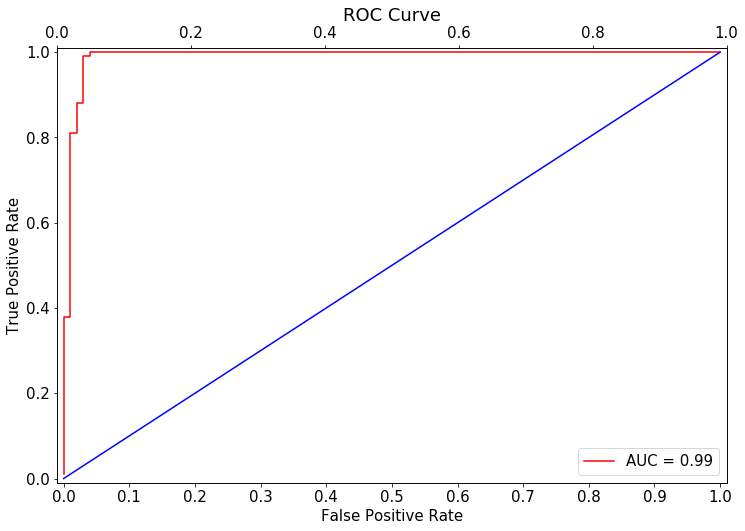

In [ ]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.metrics import auc, roc_curve

fig = plt.figure(figsize=(12, 8))
values = []
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

def plot_roc(y_test, clf):
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, ths = roc_curve(y_test, y_pred)
    auc_val = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color="red", label="AUC = {0:.2f}".format(auc_val))
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    plt.title("ROC Curve\n")
    ax1.set_xlim((-0.01, 1.01))
    ax1.set_ylim((-0.01, 1.01))
    ax1.set_xticks(np.linspace(0, 1, 11))
    ax1.plot([0, 1], [0, 1], color="blue")
    ax1.legend(loc="lower right")
    plt.show()

plot_roc(y_test, clf)


## Setting optimum threshold

Most of the time we are inclined towards setting the threshold of $0.5$ for classification tasks, but can we do better? 

Using various thresholds we can output the accuracy and select the threshold with highest accuracy. 

## Silhoutte Distance

Silhoutte Distance is used to study the separation between clusters. It can be used to evaluate and select the number of clusters. The formula is given by:

$$ s\left(i\right)=\frac{b\left(i\right)-a\left(i\right)}{\max\left(a\left(i\right),b\left(i\right)\right)} $$

Where, 
1. $a(i)$ = average distance of point $i$ with other members of same cluster. 
2. $b(i)$ = lowest of average distance of point $i$ with member of clusters other than the one it is currently present in. 

The value of $s(i)$ ranges from:

$$-1\le s\left(i\right)\le1$$

The value will be close to 1 when $b(i) >> a(i)$. That is when the nearest neighbor of point $i$ is very far & the members of clusters that $i$ is a part of aren't very far apart. This is the case when the clustering has worked well. 

The opposite case is when the value is close to -1. This happens when $a(i) >> b(i)$. That is when the the average distance of point within cluster is more than that of the neighboring one, then this indicates that the current point would do better if it is assigned to the neighboring one. 

In [ ]:
from sklearn.datasets import make_blobs

# create fake dataset
X, y = make_blobs(100, centers=3)

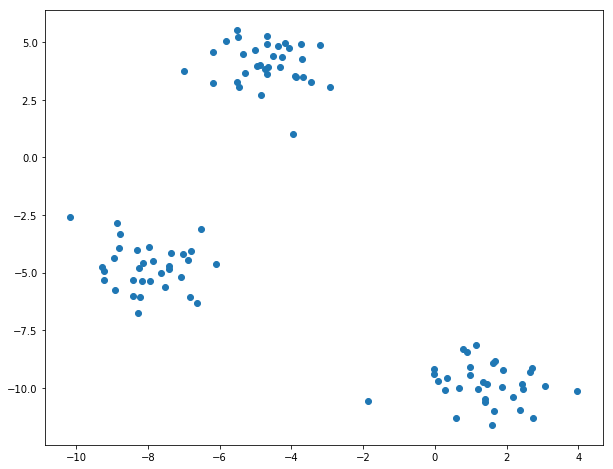

In [ ]:
# Visualize data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.show()

In [ ]:
# create classifier
import numpy as np
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=3)
y_pred = clf.fit_predict(X)

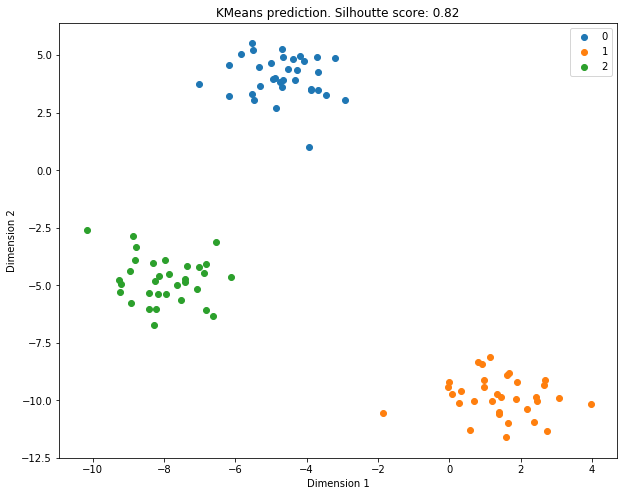

In [ ]:
# visualize output
from sklearn.metrics import silhouette_score

fig = plt.figure(figsize=(10, 8))
for label in np.unique(y_pred):
    X_label = X[y==label]
    plt.scatter([x[0] for x in X_label], [x[1] for x in X_label], label=label)

score = silhouette_score(X, y_pred)
plt.legend()
plt.title("KMeans prediction. Silhoutte score: {0:.2f}".format(score))
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

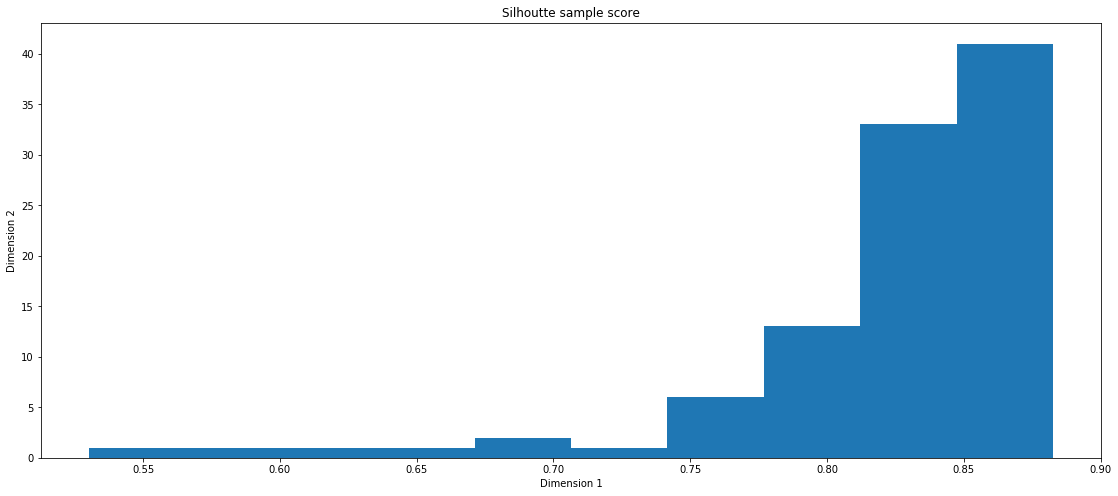

In [ ]:
# visualize silhoutte sample scores
from sklearn.metrics import silhouette_samples

fig = plt.figure(figsize=(19, 8))
sample_score = silhouette_samples(X, y_pred)
plt.hist(sample_score)
plt.title("Silhoutte sample score".format(score))
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

Since most scores are close to 1, we conclude that the model is performing very good. 